In [1]:
!mkdir -p /content/dataset  # Tạo thư mục đích nếu chưa có


In [2]:
!curl -L -o human-detection-yolo.zip https://www.kaggle.com/api/v1/datasets/download/hillsworld/human-detection-yolo


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6381M  100 6381M    0     0  72.8M      0  0:01:27  0:01:27 --:--:-- 85.1M


In [3]:
!unzip human-detection-yolo.zip -d dataset/


Streaming output truncated to the last 5000 lines.
  inflating: dataset/Final Dataset(2)/valid/labels/120192_jpg.rf.d811ec82c525151fb3f6917e941f1220.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120197_jpg.rf.cca99b3267b427453043d0b96176d52b.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120198_jpg.rf.fbc59788f5ccd7dc0e2b600ed228eb22.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120203_jpg.rf.adc453775a20a78746998992e7d5a675.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120205_jpg.rf.998cb67760714822ca4e89c4ef1cfbd4.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120214_jpg.rf.2b137e357795eb780ada0491cb3caf20.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120215_jpg.rf.d316964ba76c5cbdf420a97b99ea0933.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120218_jpg.rf.973a2b39cac178bdcf262ea2d2049c8d.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120228_jpg.rf.ffd140abeb0cfd30b64d4a184807e90f.txt  
  inflating: 

In [4]:
import os
import random

# Danh sách các tập dữ liệu (train, valid, test)
dataset_dirs = ["train", "valid", "test"]

# Đường dẫn thư mục gốc chứa dữ liệu
base_dir = "/content/dataset/HumanDetection"  # 🔹 Thay bằng đường dẫn thực tế

# Xử lý từng tập dữ liệu
for dataset in dataset_dirs:
    image_dir = os.path.join(base_dir, dataset, "images")
    label_dir = os.path.join(base_dir, dataset, "labels")

    # Lấy danh sách file ảnh (.jpg, .png)
    images = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

    # Chỉ giữ lại 25% số ảnh
    num_keep = int(0.1 * len(images))
    selected_images = set(random.sample(images, num_keep))

    # Xóa ảnh và nhãn không được chọn
    for img in images:
        img_path = os.path.join(image_dir, img)
        lbl_path = os.path.join(label_dir, img.replace(".jpg", ".txt").replace(".png", ".txt"))

        if img not in selected_images:
            os.remove(img_path)  # Xóa ảnh
            if os.path.exists(lbl_path):
                os.remove(lbl_path)  # Xóa file nhãn nếu có

    print(f"✅ Giữ lại {num_keep}/{len(images)} ảnh trong {dataset}")

print("🎯 Hoàn thành! Dữ liệu đã giảm xuống 25%.")


✅ Giữ lại 2005/20054 ảnh trong train
✅ Giữ lại 678/6781 ảnh trong valid
✅ Giữ lại 110/1100 ảnh trong test
🎯 Hoàn thành! Dữ liệu đã giảm xuống 25%.


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [6]:
import torch
print("GPU có hoạt động không?", torch.cuda.is_available())
print("Tên GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Không có GPU")


GPU có hoạt động không? True
Tên GPU: Tesla T4


In [7]:
cd /content/dataset/HumanDetection

/content/dataset/HumanDetection


In [ ]:
!rm -rf /content/dataset/HumanDetection/runs


In [8]:
from ultralytics import YOLO

# Load model YOLO11 (chỉnh lại tên model nếu khác)
model = YOLO("yolo11n.pt")  # Hoặc yolo11s.pt, yolo11m.pt nếu GPU đủ mạnh

# Huấn luyện với tối ưu cho T4 GPU
results = model.train(
    data="data.yaml",  # Đường dẫn đến file dataset.yaml
    epochs=50,            # Tối ưu cho T4 GPU, không quá nặng
    imgsz=640,            # Kích thước ảnh (không nên cao hơn trên T4)
    batch=8,              # Batch nhỏ do RAM GPU hạn chế
    device="cuda",        # Chạy trên GPU
    workers=2,            # Sử dụng ít worker để tránh nghẽn CPU
    patience=5,           # Dừng sớm nếu không cải thiện sau 5 epochs
    optimizer="AdamW",    # Tối ưu hóa nhanh hơn trên GPU
    lr0=0.002,            # Tăng tốc độ học nhẹ
    cos_lr=True,          # Dùng Cosine Learning Rate Decay
    cache=True,           # Dùng cache để tăng tốc load dữ liệu
    dropout=0.05          # Giảm overfitting
)

print("✅ Huấn luyện hoàn tất!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 97.9MB/s]


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=cuda, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.05, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/HumanDetection/train/labels... 2005 images, 181 backgrounds, 0 corrupt: 100%|██████████| 2005/2005 [00:05<00:00, 348.41it/s]


train: New cache created: /content/dataset/HumanDetection/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.8GB RAM): 100%|██████████| 2005/2005 [00:15<00:00, 132.85it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/HumanDetection/valid/labels... 678 images, 37 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:02<00:00, 330.49it/s]

val: New cache created: /content/dataset/HumanDetection/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.6GB RAM): 100%|██████████| 678/678 [00:06<00:00, 102.52it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.002, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.65G      1.475      1.632      1.446         62        640: 100%|██████████| 251/251 [00:45<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.44it/s]

                   all        678       2486      0.391      0.348      0.283      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.08G      1.439      1.396      1.438         38        640: 100%|██████████| 251/251 [00:40<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.62it/s]


                   all        678       2486      0.367      0.307      0.243        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.1G      1.392      1.306      1.407         27        640: 100%|██████████| 251/251 [00:39<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.67it/s]


                   all        678       2486      0.409      0.322      0.265      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.1G       1.32      1.216      1.368         35        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.34it/s]

                   all        678       2486      0.417      0.324      0.275      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.13G      1.259      1.149      1.331         18        640: 100%|██████████| 251/251 [00:39<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.37it/s]


                   all        678       2486      0.408      0.328      0.275      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G      1.207      1.086      1.299         23        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.40it/s]

                   all        678       2486       0.41      0.366      0.314       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.15G      1.133     0.9933      1.257         35        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.84it/s]


                   all        678       2486      0.506      0.343      0.333       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G      1.087     0.9773      1.239         55        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.01it/s]


                   all        678       2486      0.497      0.338      0.338       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.043     0.9016      1.205         51        640: 100%|██████████| 251/251 [00:38<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.15it/s]


                   all        678       2486       0.47      0.359      0.353      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.2G      1.005     0.8928      1.197         23        640: 100%|██████████| 251/251 [00:39<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.81it/s]


                   all        678       2486      0.491       0.36      0.349      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.21G     0.9997     0.8756      1.181         24        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.95it/s]

                   all        678       2486      0.509      0.371      0.355      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.22G     0.9544     0.8268      1.156         25        640: 100%|██████████| 251/251 [00:39<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.38it/s]


                   all        678       2486      0.502      0.344      0.342      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.24G     0.9107     0.7977       1.14         25        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.35it/s]


                   all        678       2486      0.528      0.392      0.381      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.26G     0.9066     0.7925      1.128         29        640: 100%|██████████| 251/251 [00:39<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.80it/s]

                   all        678       2486      0.509      0.364      0.365      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.27G      0.887     0.7753      1.127         44        640: 100%|██████████| 251/251 [00:39<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.42it/s]


                   all        678       2486      0.517      0.368      0.363      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.29G      0.876     0.7523      1.113         15        640: 100%|██████████| 251/251 [00:39<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.66it/s]

                   all        678       2486      0.485      0.384      0.366      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.31G     0.8426     0.7364      1.101         18        640: 100%|██████████| 251/251 [00:40<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.63it/s]


                   all        678       2486       0.53      0.391      0.391      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.32G      0.825     0.7133      1.086         29        640: 100%|██████████| 251/251 [00:39<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.89it/s]

                   all        678       2486      0.526        0.4      0.394      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.33G     0.7878     0.6977      1.073         28        640: 100%|██████████| 251/251 [00:39<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.56it/s]

                   all        678       2486      0.513      0.411      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.34G     0.7998     0.6925      1.079         35        640: 100%|██████████| 251/251 [00:39<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.98it/s]


                   all        678       2486      0.532      0.413      0.406      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G     0.7774     0.6636      1.066         62        640: 100%|██████████| 251/251 [00:39<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.40it/s]

                   all        678       2486      0.584       0.39      0.413      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G     0.7422     0.6481       1.05         30        640: 100%|██████████| 251/251 [00:39<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.13it/s]


                   all        678       2486      0.524      0.399      0.394      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.39G     0.7236     0.6321      1.043         52        640: 100%|██████████| 251/251 [00:40<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.44it/s]

                   all        678       2486      0.549      0.407      0.414      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.4G     0.7336     0.6303      1.042         31        640: 100%|██████████| 251/251 [00:40<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.86it/s]

                   all        678       2486      0.544      0.409      0.406      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.42G     0.7184     0.6218      1.038         22        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.74it/s]


                   all        678       2486       0.58      0.409      0.437      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.43G     0.7083     0.6041      1.026         30        640: 100%|██████████| 251/251 [00:40<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.73it/s]


                   all        678       2486      0.532      0.425      0.416      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.45G     0.6922     0.5943      1.028         31        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.78it/s]

                   all        678       2486      0.562      0.409      0.409      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.46G     0.6764     0.5828      1.017         36        640: 100%|██████████| 251/251 [00:39<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.79it/s]


                   all        678       2486      0.559      0.423      0.431       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.48G      0.656      0.566       1.01         23        640: 100%|██████████| 251/251 [00:39<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.64it/s]

                   all        678       2486      0.546       0.42      0.423      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.49G     0.6472     0.5552      1.009         21        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.76it/s]

                   all        678       2486      0.589        0.4      0.428      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.51G     0.6407      0.555      1.006         14        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.05it/s]

                   all        678       2486      0.535      0.421      0.426      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.52G      0.641     0.5578      1.006         25        640: 100%|██████████| 251/251 [00:39<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.36it/s]

                   all        678       2486      0.573      0.429      0.441      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.54G     0.6124     0.5282          1         27        640: 100%|██████████| 251/251 [00:39<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.83it/s]


                   all        678       2486      0.574      0.436      0.445      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.55G     0.6222     0.5341     0.9954         28        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.58it/s]

                   all        678       2486      0.575      0.444      0.449      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.57G     0.6125     0.5252     0.9961         36        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.68it/s]


                   all        678       2486      0.552      0.454      0.443      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.57G     0.5946     0.5104     0.9847         19        640: 100%|██████████| 251/251 [00:39<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.67it/s]

                   all        678       2486      0.605      0.414      0.439      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.6G     0.5722     0.4933     0.9729         14        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.02it/s]

                   all        678       2486      0.598      0.426      0.445      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.61G     0.5575     0.4927     0.9734         31        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.52it/s]


                   all        678       2486      0.574      0.431      0.446      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.63G     0.5797     0.5005     0.9809         33        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.98it/s]


                   all        678       2486       0.59      0.428       0.45      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.64G     0.5563     0.4817     0.9689         28        640: 100%|██████████| 251/251 [00:39<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.74it/s]

                   all        678       2486      0.609      0.426      0.454       0.24


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.66G      1.604      1.496      1.567          7        640: 100%|██████████| 251/251 [00:39<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.48it/s]

                   all        678       2486      0.577      0.439      0.458      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G      1.508      1.364      1.473         20        640: 100%|██████████| 251/251 [00:37<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.52it/s]

                   all        678       2486      0.565      0.457      0.469      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.69G      1.506      1.338       1.47         14        640: 100%|██████████| 251/251 [00:37<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.97it/s]

                   all        678       2486      0.622       0.44      0.478      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.69G      1.503      1.308      1.463         23        640: 100%|██████████| 251/251 [00:38<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.29it/s]

                   all        678       2486      0.566      0.461      0.474      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.71G       1.48      1.282      1.449         18        640: 100%|██████████| 251/251 [00:38<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.62it/s]

                   all        678       2486      0.592      0.459      0.479      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.73G      1.468      1.283      1.439          8        640: 100%|██████████| 251/251 [00:38<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.08it/s]

                   all        678       2486      0.584      0.469      0.482      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.75G      1.456      1.268      1.429         14        640: 100%|██████████| 251/251 [00:38<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.65it/s]

                   all        678       2486      0.588      0.469      0.485      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.76G      1.445      1.252      1.429          7        640: 100%|██████████| 251/251 [00:38<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.99it/s]

                   all        678       2486      0.591      0.466      0.483      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.78G      1.445      1.247      1.435         26        640: 100%|██████████| 251/251 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.63it/s]


                   all        678       2486      0.576      0.468      0.483      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.79G      1.445      1.254      1.423         26        640: 100%|██████████| 251/251 [00:38<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.11it/s]

                   all        678       2486      0.581      0.477      0.488       0.26



50 epochs completed in 0.623 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.34it/s]


                   all        678       2486       0.58      0.476      0.488       0.26
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train
✅ Huấn luyện hoàn tất!



image 1/1 /content/12.png: 288x640 13 Persons, 46.2ms
Speed: 1.8ms preprocess, 46.2ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)


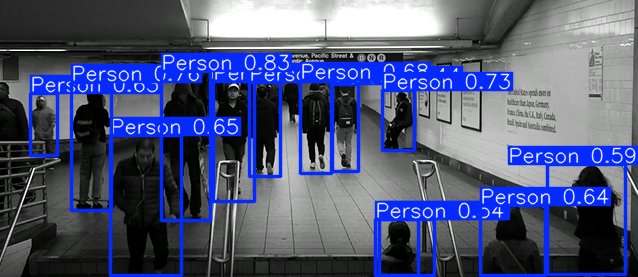


image 1/1 /content/dataset/HumanDetection/valid/images/01ba1dee2cf8ff2b.jpg: 480x640 1 Person, 14.1ms
Speed: 5.3ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


AttributeError: 'list' object has no attribute 'show'

In [ ]:
from ultralytics import YOLO

# Load mô hình
from ultralytics import YOLO
from PIL import Image

# Load mô hình YOLO
model = YOLO("/content/dataset/HumanDetection/runs/detect/train/weights/best.pt")

# Đọc ảnh đầu vào
image_path = "/content/12.png"

# Chạy mô hình để dự đoán
results = model(image_path)

# Hiển thị kết quả
results[0].show()  # Lấy phần tử đầu tiên trong list

# Chạy dự đoán trên ảnh
results = model("/content/dataset/HumanDetection/valid/images/01ba1dee2cf8ff2b.jpg")

# Hiển thị kết quả
results.show()
